In [15]:
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname("src"))))
from src.LogViewer import LogViewer
from src.utils import SingleModelTrainingProcess
from src.Mydataloader import LoadDataset
import torch
import torch.nn as nn
import torch.optim as optim
import sys, os, tqdm
from torchvision.transforms.v2 import (
    RandomHorizontalFlip,
    Compose,
    RandomCrop,
    RandomShortestSize,
    Normalize,
    CenterCrop,
    ToImage,
    ToDtype,
)
from torchvision import datasets
from torch.utils.data import DataLoader

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname("src"))))

from src.Earlystopper import EarlyStopper
from src.Mymodel import MyResNet34

In [16]:
file_name = "MyResNet34_ImageNet2012_rezero_120.pth.tar"
model = MyResNet34(num_classes=1000, Downsample_option="B").to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 60], gamma=0.1)
file_name = "MyResNet34_ImageNet2012_rezero"
earlystopper = EarlyStopper(patience=999, model=model, file_name=file_name)

In [17]:
checkpoint = torch.load(
    file_name + ".pth.tar",
    map_location=lambda storage, loc: storage.cuda("cuda"),
)

model.load_state_dict(checkpoint["model"])
optimizer.load_state_dict(checkpoint["optimizer"])
scheduler.load_state_dict(checkpoint["scheduler"])
logs = checkpoint["logs"]
earlystopper.load_state_dict(checkpoint["earlystopper"])

print("Suceessfully loaded the All setting and Log file.")
print(file_name)
print(f"- Current epoch : {len(logs['train_loss'])}")
print(f"┌ Current best valid loss : {min(logs['valid_loss'])}")
print(f"└ Current best model loss : {earlystopper.best_eval_loss}")

Suceessfully loaded the All setting and Log file.
MyResNet34_ImageNet2012_rezero
- Current epoch : 120
┌ Current best valid loss : 1.3284383087742084
└ Current best model loss : 1.3284383087742084


In [18]:
print(logs.keys())

logs['test_loss'] = [0]
logs['test_acc'] = [0]
print(logs.keys())


dict_keys(['train_loss', 'train_acc', 'valid_loss', 'valid_acc', 'lr_log'])
dict_keys(['train_loss', 'train_acc', 'valid_loss', 'valid_acc', 'lr_log', 'test_loss', 'test_acc'])


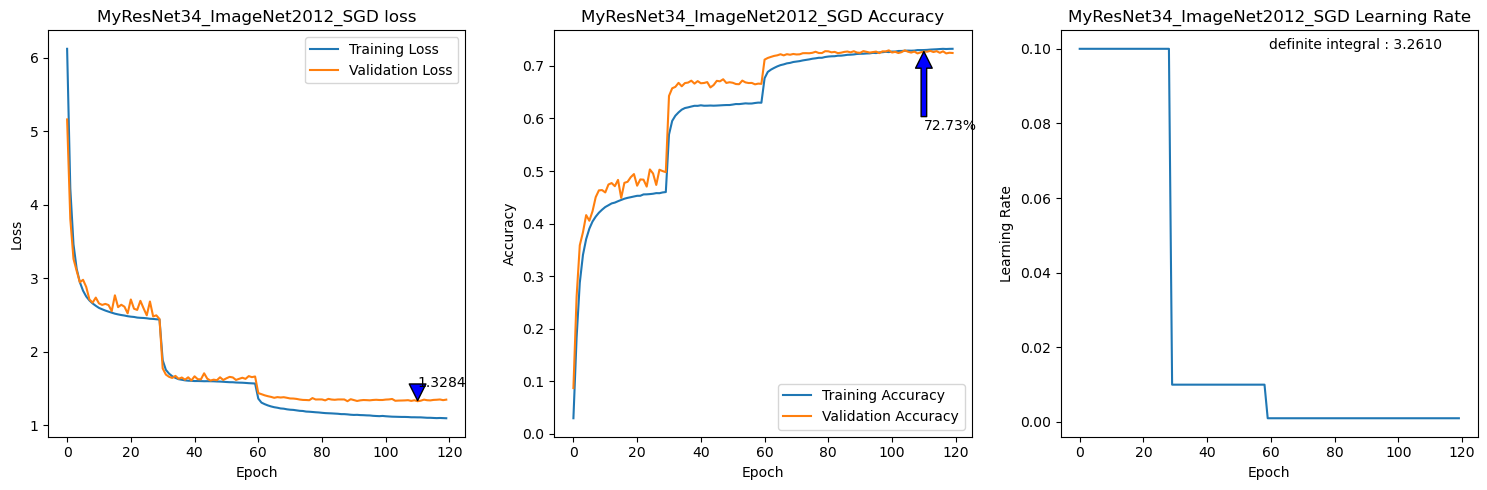

In [19]:
viewer = LogViewer(logs)
# viewer.print_all()
viewer.draw(
    title="MyResNet34_ImageNet2012_SGD",
    min_marker=True,
    save=True,
    add_lr_plot=True,
)

In [20]:
# for training in each_trainings:
#     # training.logs["train_loss"] = training.logs["train_loss"][:108]
#     # training.logs["train_acc"] = training.logs["train_acc"][:108]
#     # training.logs["valid_loss"] = training.logs["valid_loss"][:108]
#     # training.logs["valid_acc"] = training.logs["valid_acc"][:108]
#     # training.logs["test_loss"] = training.logs["test_loss"][:108]
#     # training.logs["test_acc"] = training.logs["test_acc"][:108]
#     # training.logs["lr_log"] = training.logs["lr_log"][:108]
#     training.save_model()

In [21]:
# import numpy as np
# print(np.min(each_trainings[0].logs["valid_loss"]))
# print(np.min(each_trainings[1].logs["valid_loss"]))

In [22]:
# each_trainings[0].earlystopper.best_eval_loss = 3.1306022539430733
# each_trainings[1].earlystopper.best_eval_loss = 1.3550978181313496

In [23]:
# # each_trainings[0].save_model()
# # each_trainings[1].save_model()
# import torch
# torch.save(each_trainings[0].model.state_dict(), each_trainings[0].file_name + ".pth")
# torch.save(each_trainings[1].model.state_dict(), each_trainings[1].file_name + ".pth")